# ANN PROJECT

In [1]:
import os
import tensorflow as tf #deep learning modelling library
import numpy as np #for mathematical operations
import pandas as pd #for data processing
import matplotlib.pyplot as plt #visualizing
import seaborn as sns

In [2]:
from tensorflow.keras.layers import Normalization,Dense,InputLayer
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.losses import MeanSquaredError,MeanAbsoluteError,Huber
from tensorflow.keras.optimizers import Adam

## Data Preprocessing

In [3]:
data=pd.read_csv(r"C:\Users\penfr\OneDrive\Desktop\Intellipaat_Python\ANN_second_hand_cars\train.csv")

In [4]:
data.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [5]:
#Run this to check object type columns
'''obj=[]
for col in data.columns:
    if data[col].dtype=='object':
       obj.append(col) 
print("Object type columns:",obj)'''

'obj=[]\nfor col in data.columns:\n    if data[col].dtype==\'object\':\n       obj.append(col) \nprint("Object type columns:",obj)'

In [6]:
#Check number of rows and columns
row,columns=data.shape
print(f"The data set contains {row} samples and {columns} features")

The data set contains 1000 samples and 12 features


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   v.id           1000 non-null   int64  
 1   on road old    1000 non-null   int64  
 2   on road now    1000 non-null   int64  
 3   years          1000 non-null   int64  
 4   km             1000 non-null   int64  
 5   rating         1000 non-null   int64  
 6   condition      1000 non-null   int64  
 7   economy        1000 non-null   int64  
 8   top speed      1000 non-null   int64  
 9   hp             1000 non-null   int64  
 10  torque         1000 non-null   int64  
 11  current price  1000 non-null   float64
dtypes: float64(1), int64(11)
memory usage: 93.9 KB


In [8]:
data.describe()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.00000
mean,500.500000,601648.286000,799131.3970,4.561000,100274.430000,2.988000,5.592000,11.625000,166.89300,84.54600,103.423000,308520.24250
std,288.819436,58407.246204,57028.9502,1.719079,29150.463233,1.402791,2.824449,2.230549,19.28838,20.51694,21.058716,126073.25915
min,1.000000,500265.000000,700018.0000,2.000000,50324.000000,1.000000,1.000000,8.000000,135.00000,50.00000,68.000000,28226.50000
25%,250.750000,548860.500000,750997.7500,3.000000,74367.500000,2.000000,3.000000,10.000000,150.00000,67.00000,85.000000,206871.75000
50%,500.500000,601568.000000,798168.0000,5.000000,100139.500000,3.000000,6.000000,12.000000,166.00000,84.00000,104.000000,306717.75000
75%,750.250000,652267.250000,847563.2500,6.000000,125048.000000,4.000000,8.000000,13.000000,184.00000,102.00000,121.000000,414260.87500
max,1000.000000,699859.000000,899797.0000,7.000000,149902.000000,5.000000,10.000000,15.000000,200.00000,120.00000,140.000000,584267.50000


In [9]:
data.isna().sum()

v.id             0
on road old      0
on road now      0
years            0
km               0
rating           0
condition        0
economy          0
top speed        0
hp               0
torque           0
current price    0
dtype: int64

In [10]:
data.duplicated().sum()

0

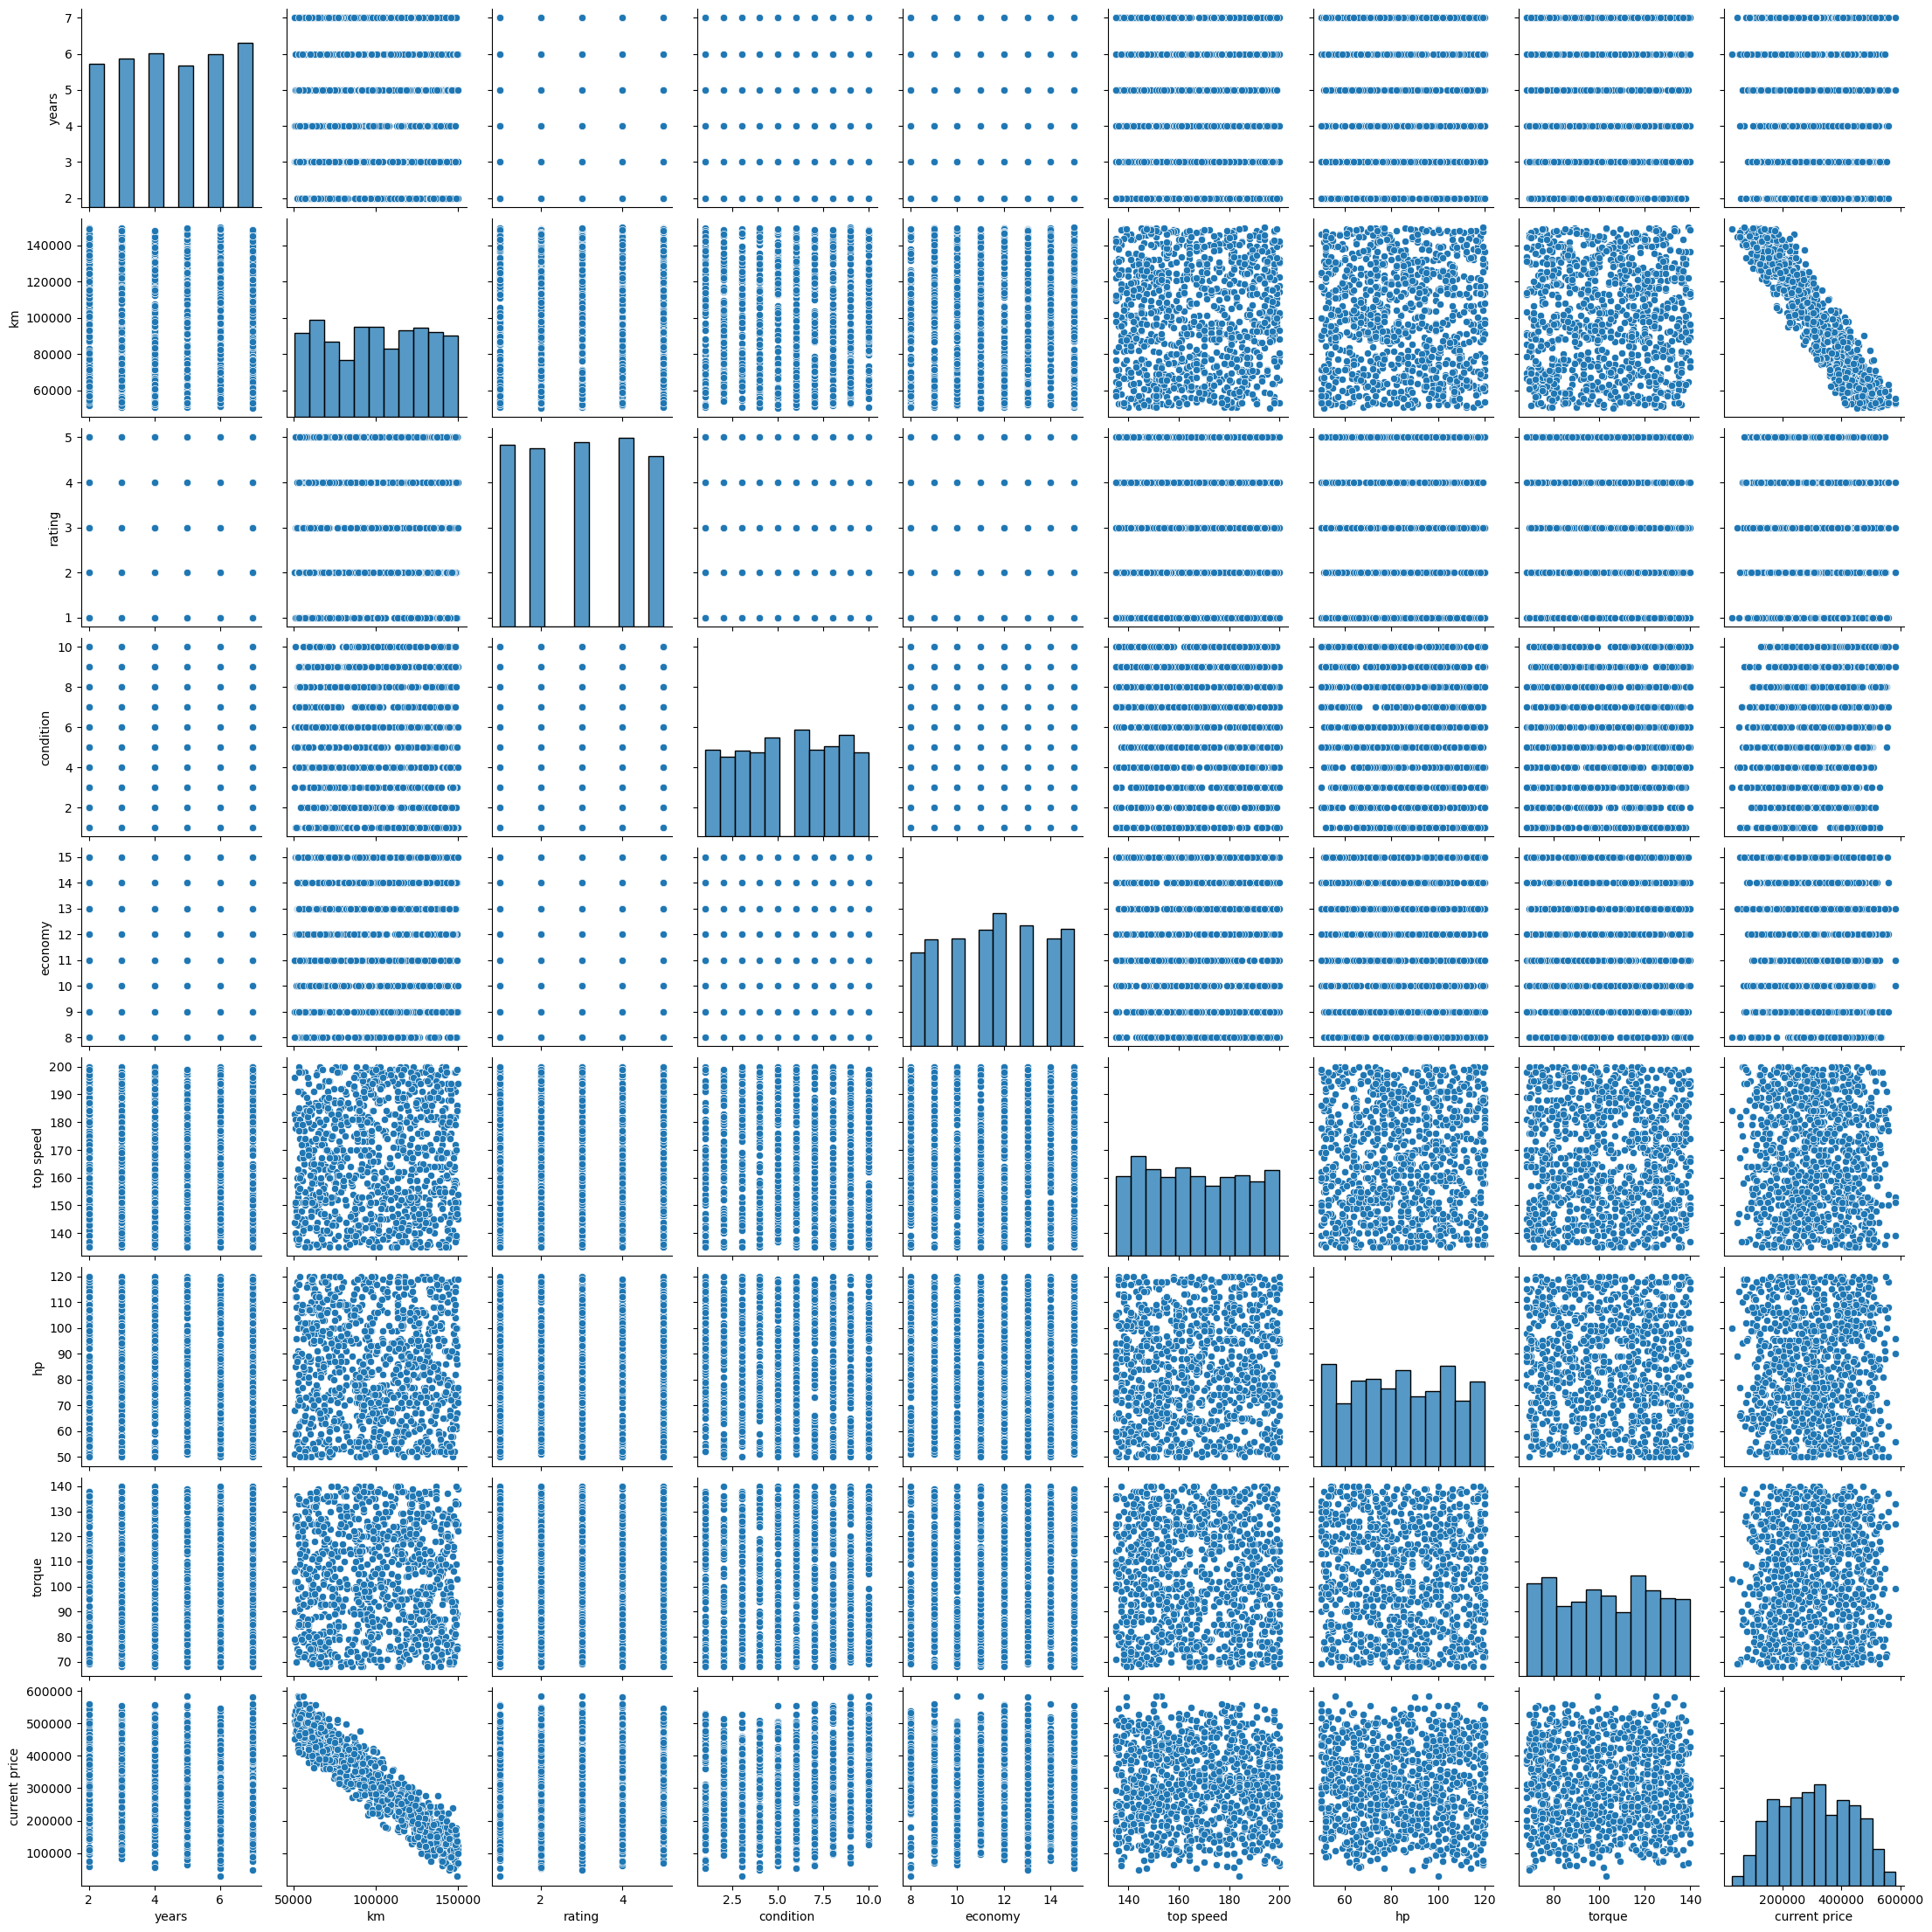

In [11]:
#Comparison
sns.pairplot(data[['years', 'km', 'rating',
       'condition', 'economy', 'top speed', 'hp', 'torque', 'current price']])
folder_path = r"C:\Users\penfr\OneDrive\Desktop\Intellipaat_Python\ANN_second_hand_cars"
file_name = "pairplot.png"
file_path = os.path.join(folder_path, file_name)
plt.savefig(file_path)
plt.show()

# Insights

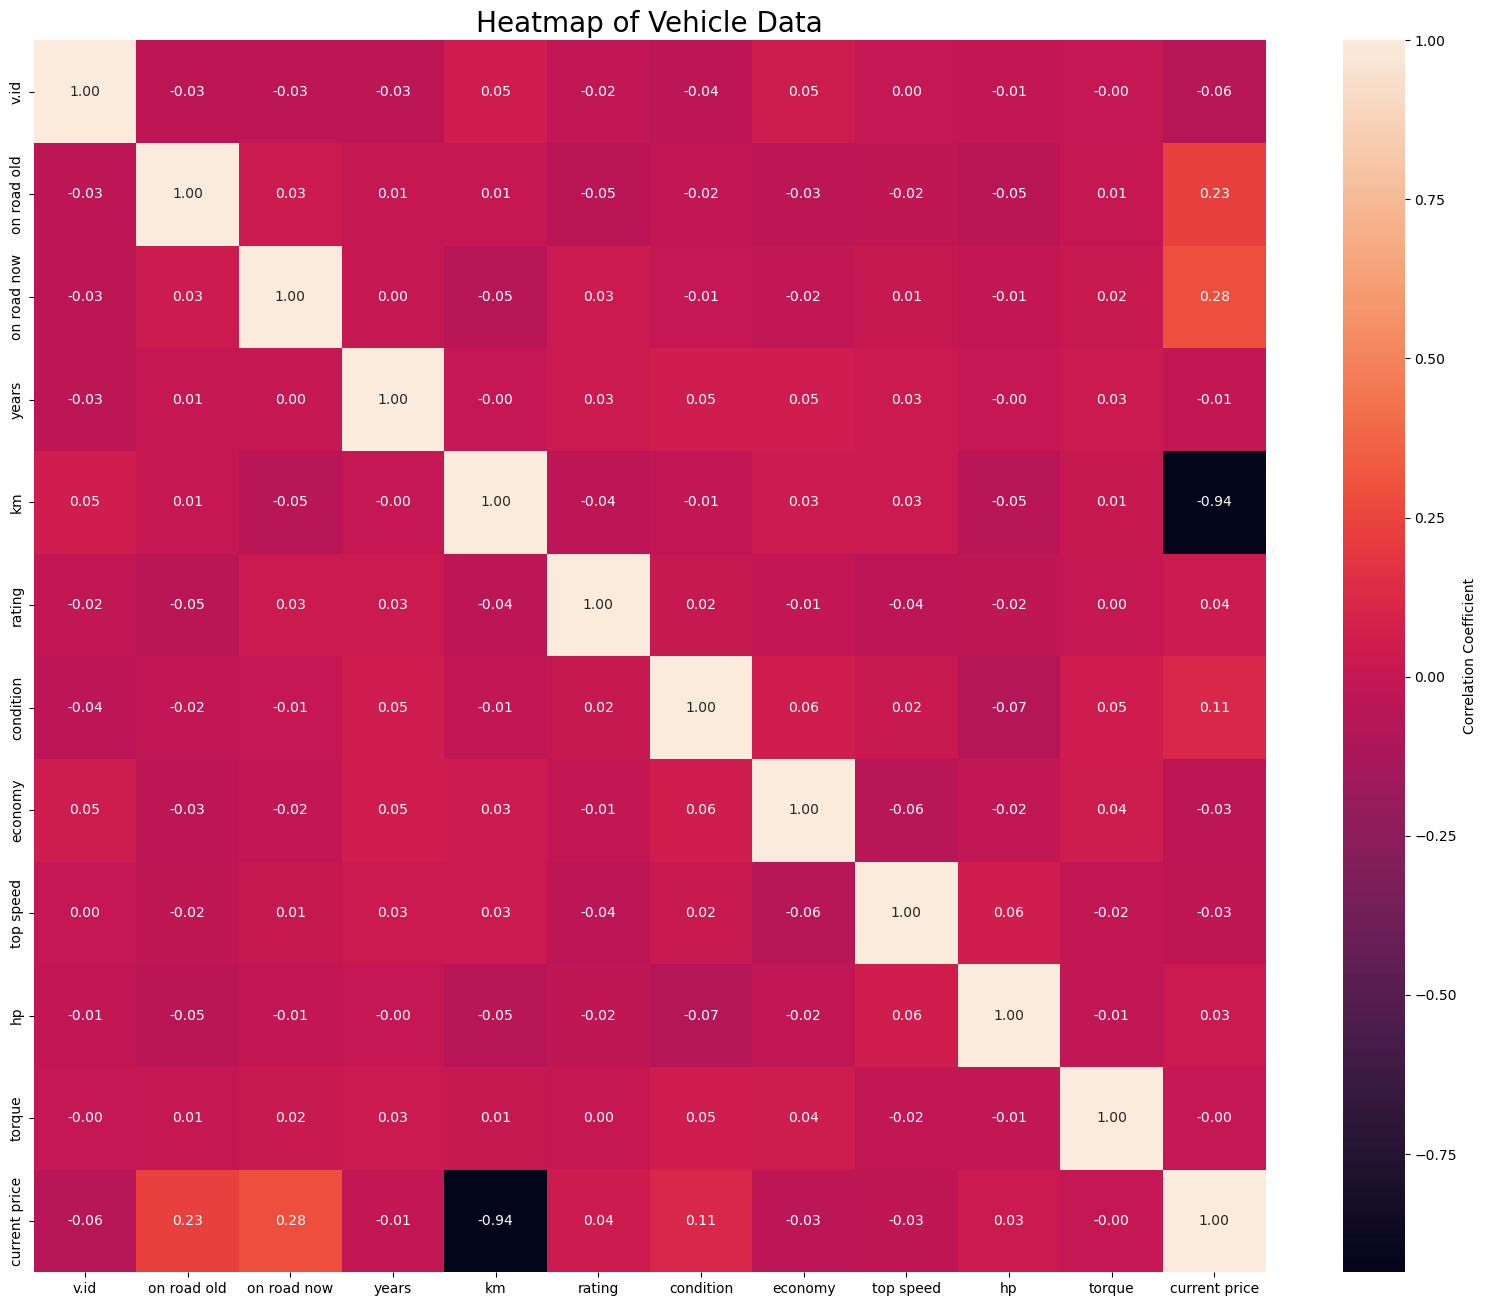

In [12]:
# Create a correlation matrix
corr_matrix = data.corr()

plt.figure(figsize=(20, 16))  # Larger figure size for less congestion
# Create the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cbar_kws={'label': 'Correlation Coefficient'}, square=True)

# Add title and labels
plt.title('Heatmap of Vehicle Data', fontsize=20)



folder_path = r"C:\Users\penfr\OneDrive\Desktop\Intellipaat_Python\ANN_second_hand_cars"
file_name = "heatmap.png"
file_path = os.path.join(folder_path, file_name)
plt.savefig(file_path)
plt.show()


# Insights

In [ ]:
#Shuffling the data to avoid depending on the order of the data
import tensorflow as tf #deep learning modelling library
shuffled_data=tf.random.shuffle(data)
shuffled_data[:5]

In [ ]:
X=shuffled_data[:,3:-1]
y=shuffled_data[:,-1]

In [ ]:
print(X.shape)

In [ ]:
print(y.shape) #target variable

In [ ]:
#Normalizing data
normaliser=Normalization(axis=-1) #means along columns we are calculating (x-mean/std)
normaliser.adapt(X) #adapt method computes the mean and standard deviation of the data X.
X_normalised=normaliser(X) #The data is transformed by subtracting the mean and dividing by the standard deviation, computed during the adapt step.
print(X_normalised)

# Model building

In [ ]:
model=tf.keras.Sequential([
    InputLayer(input_shape=(8,)),
    normaliser, #First layer is the Normalization layer, which normalizes the input data.
    Dense(1), #Second layer is a Dense layer with 1 unit (output neuron). This is a fully connected layer that will output a single value.
],name="first_sequential_API")
model.summary() 

In [ ]:
#!pip install pydot

In [ ]:

# Visualize the model
tf.keras.utils.plot_model(
    model,
    to_file="first_sequential_model.png",
    show_shapes=True
)

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001),loss=tf.keras.losses.Huber())


In [ ]:
X.shape

In [ ]:
y.shape

In [ ]:
history=model.fit(X,y,epochs=20,verbose=1)

In [ ]:
history.history

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title("Model Loss")
plt.legend(['train'])
plt.show()